<a href="https://colab.research.google.com/github/rahul261098/Analyze-Fitness-Data-using-Excel/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1=pd.read_csv('/content/ML case Study.csv',header=0)
df2=pd.read_csv('/content/Colleges.csv',header=0)
df3=pd.read_csv('/content/cities.csv',header=0)

## EDD PROCCESS

In [ ]:
df2.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [ ]:
Tier1=df2["Tier 1"].tolist()
Tier2=df2["Tier 2"].tolist()
Tier3=df2["Tier 3"].tolist()

In [ ]:
df2.dropna()

for item in df1.College:
  if item in Tier1:
    df1["College"].replace(item,1,inplace=True)
  elif item in Tier2:
    df1["College"].replace(item,2,inplace=True)
  elif item in Tier3:
    df1["College"].replace(item,3,inplace=True)

In [ ]:
df1.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10


In [ ]:
df3.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [ ]:
metrocity=df3["Metrio City"].tolist()
nonmetrocity=df3["non-metro cities"].tolist()

In [ ]:
df3.dropna()
for item in df1.City:
  if item in metrocity:
    df1["City"].replace(item,1,inplace=True)
  elif item in nonmetrocity:
    df1["City"].replace(item,0,inplace=True)

In [ ]:
df1.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


In [ ]:
df=pd.get_dummies(df1)

In [ ]:
df["Role_Executive"]=df["Role_Executive"].astype(int)

In [ ]:
df["Role_Manager"]=df["Role_Manager"].astype(int)

In [ ]:
df.head(100)

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,0,1
1,2,0,57081.0,1,84,18,68005.87,1,0
2,3,0,60347.0,2,52,28,76764.02,1,0
3,3,0,49010.0,2,81,33,82092.39,1,0
4,1,0,57879.0,4,74,32,73878.10,1,0
...,...,...,...,...,...,...,...,...,...
95,1,1,59707.0,3,70,28,56003.61,1,0
96,2,1,57726.0,4,84,54,68673.29,1,0
97,1,1,58401.0,4,45,55,76028.50,1,0
98,1,0,41228.0,2,64,56,87418.05,0,1


In [ ]:
del df["Role_Executive"]

## CORRELATION MATRIX

In [ ]:
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


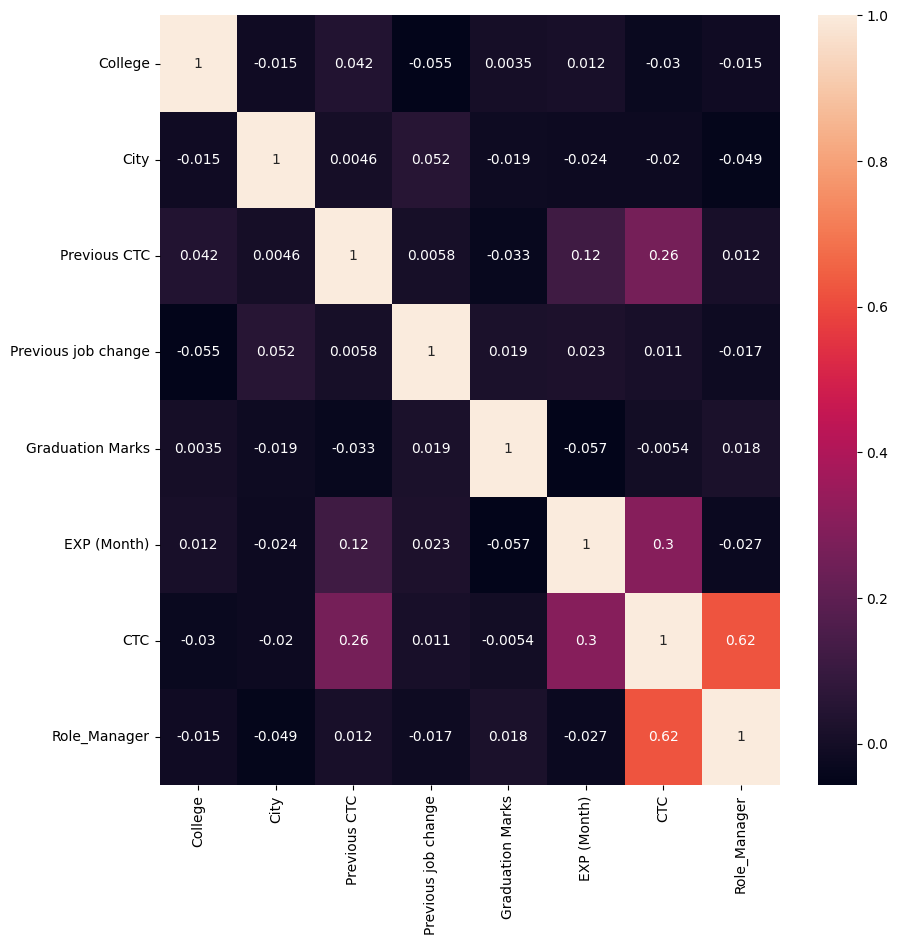

In [ ]:
# # Assuming capped_df is your DataFrame
# correlation_matrix = df.corr()
# # Set the size of the figure
# plt.figure(figsize=(10, 10))

# # Create a heatmap
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='PRGn', cbar=True)

# # Add title and labels
# plt.title("Correlation Matrix")
# plt.show()


corr_matrix=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True)
plt.show()

After applying correlation matrix the
Previous ctc and Previous Job change
are imapacting on CTC.


In [ ]:
import statsmodels.api as sm
x=df.drop(['CTC'],axis=1)
y=df['CTC']
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Mon, 14 Oct 2024   Prob (F-statistic):          4.70e-257
Time:                        07:07:10   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.842e+04   2192.660     17.523      0.000    3.41e+04    4.27e+04
College              -481.5147    258.382     -1.864      0.063    -988.321      25.292
City                  380.8308    433.455      0.879      0.380    -469.377    1231.039
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
Role_Manager         1.949e+04    534.694     36.446      0.000    1.84e+04    2.05e+04
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     5.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multi Linear Regression AND Train Test Split

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

y=df['CTC']
x=df.drop(['CTC'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mse_train=mean_squared_error(y_train,y_pred_train)
r2_train=r2_score(y_train,y_pred_train)
print('MSE:',mse)
print('R2 test:',r2)
print('MSE_train:',mse_train)
print('R2_train:',r2_train)


MSE: 77362774.9495653
R2 test: 0.5933517958385095
MSE_train: 73096299.02751341
R2_train: 0.5137747142134839


In [ ]:


# Extracting the 'CTC' column to find its correlations with other features
correlation_matrix = df.corr()
quality_correlations = correlation_matrix['CTC'].drop('CTC')  # Exclude self-correlation

# Finding the feature with the highest correlation with  ctc
most_correlated_feature = quality_correlations.idxmax()
highest_correlation = quality_correlations.max()

most_correlated_feature, highest_correlation

('Role_Manager', 0.6213110960061289)

ROLE MANAGER Is Highly Related To CTC

## RIDGE

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions
ridge_predictions = ridge_model.predict(X_test_scaled)
ridge_predictions_train = ridge_model.predict(X_train_scaled)

# Evaluate the model
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_mse_train = mean_squared_error(y_train, ridge_predictions_train)
ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_r2_train = r2_score(y_train, ridge_predictions_train)


print("Ridge Regression Results:")
print("Coefficients:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)
print("Mean Squared Error:", ridge_mse)
print("R-squared:", ridge_r2)
print("Mean Squared Error (Train):", ridge_mse_train)
print("R-squared (Train):", ridge_r2_train)

print("Ridge regression analysis completed.")

Ridge Regression Results:
Coefficients: [-434.57456486  240.70579217 2801.16075155    9.69634084   28.94901972
 3465.09809378 7465.42951608]
Intercept: 75284.838245476
Mean Squared Error: 77388795.36074282
R-squared: 0.5932150226490295
Mean Squared Error (Train): 73096345.59097074
R-squared (Train): 0.513774404480561
Ridge regression analysis completed.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Corrected the argument name to 'param_grid'
param_grid={'alpha':[1]}
ridge=Ridge()
grid_search=GridSearchCV(estimator=Ridge(),param_grid=param_grid,cv=5,scoring='r2')
grid_search.fit(X_train_scaled,y_train)

best_param=grid_search.best_params_
best_score=grid_search.best_score_
print('Best Parameters:',best_param)
print('Best Score:',best_score)

Best Parameters: {'alpha': 1}
Best Score: 0.5029478496729242


## LASSO

In [ ]:

from sklearn.linear_model import Lasso

# Create a Lasso regression model with an alpha parameter of 0.01
lasso_model = Lasso(alpha=0.05)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# Calculate R^2 scores
r2_score_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_score_test_lasso = r2_score(y_test, y_test_pred_lasso)

# Print R^2 scores
print("R^2 score for training set (Lasso):", r2_score_train_lasso)
print("R^2 score for testing set (Lasso):", r2_score_test_lasso)


R^2 score for training set (Lasso): 0.5137747139994266
R^2 score for testing set (Lasso): 0.5933493643024406


LASSO GIVES MORE ACCUARATE VALUES
LASSO PREVENT OVERFITTING

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import r2_score
# import graphviz
# from sklearn import tree

# # Initialize the Decision Tree Regressor
# dt_regressor = DecisionTreeRegressor(random_state=42)

# # Train the model
# dt_regressor.fit(X_train, y_train)

# # Predict the test set results
# y_pred_test = dt_regressor.predict(X_test)
# y_pred_train = dt_regressor.predict(X_train)

# # Evaluate the model with R² score
# r2_test = r2_score(y_test, y_pred_test)
# r2_train = r2_score(y_train, y_pred_train)

# print("R^2 score for training set (Decision Tree):", r2_train)
# print("R^2 score for testing set (Decision Tree):", r2_test)

In [ ]:
# import graphviz
# # Initialize the Decision Tree Regressor with max_depth set to 5
# dt_regressor_tuned = DecisionTreeRegressor(max_depth=5, random_state=42)

# # Train the model with the new setting
# dt_regressor_tuned.fit(X_train, y_train)

# # Predict the test and training set resultsa
# y_pred_test_tuned = dt_regressor_tuned.predict(X_test)
# y_pred_train_tuned = dt_regressor_tuned.predict(X_train)

# # Evaluate the model with R² score for the tuned model
# r2_test_tuned = r2_score(y_test, y_pred_test_tuned)
# r2_train_tuned = r2_score(y_train, y_pred_train_tuned)

# # Visualize the Decision Tree
# dot_data_tuned = tree.export_graphviz(dt_regressor_tuned, out_file=None,
#                                       feature_names=X.columns,
#                                       filled=True, rounded=True,
#                                       special_characters=True)
# graph_tuned = graphviz.Source(dot_data_tuned)

# r2_train_tuned, r2_test_tuned, graph_tuned

# # Visualize the Decision Tree using Graphviz (re-creating for clarity and focus)
# dot_data_final = tree.export_graphviz(dt_regressor_tuned, out_file=None,
#                                       feature_names=X.columns,
#                                       filled=True, rounded=True,
#                                       special_characters=True,
#                                       class_names=['quality'])
# graph_final = graphviz.Source(dot_data_final)
# graph_final